In [88]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import sympy as sy
import sympy.physics.quantum.constants as const

x, y, z = sy.symbols('x y z')
sy.init_printing()

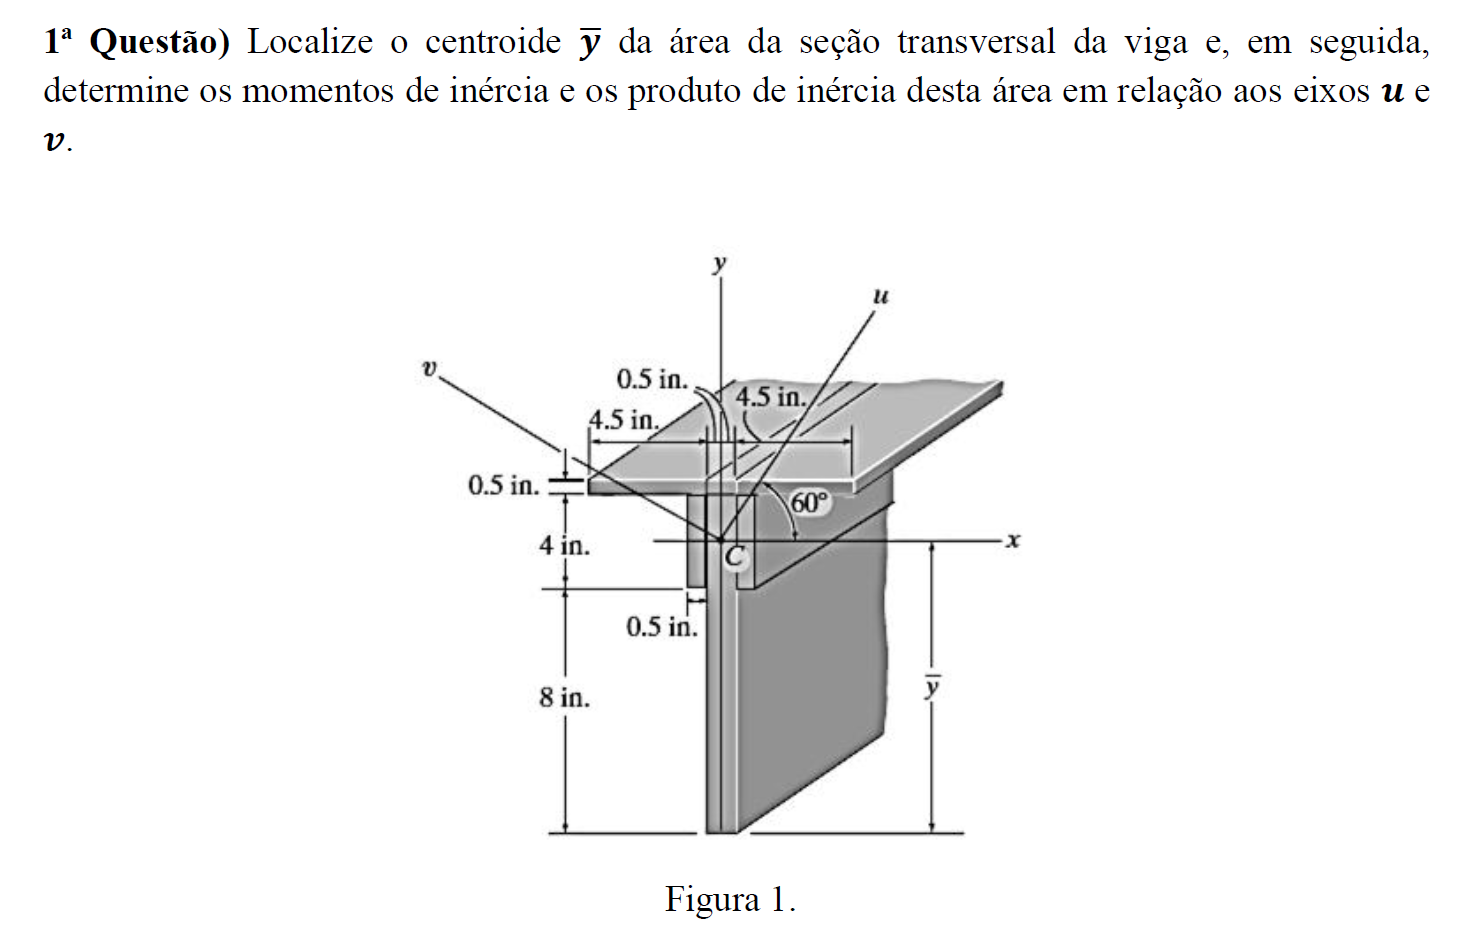

In [89]:
ipd.Image(filename='L8Q1.png')

# Dados Necessários:

In [90]:
theta = 60 # [ º]
theta = m.radians(theta) # [ º]
espessura_base = 0.5 # [in]
L_base = 10 # [in]
L_alma = 8 # [in]
L_alma2 = 4 # [in]

Objetivos:
1. subdividir as áreas a serem estudadas.
2. calcular os momentos de inércia associados às áreas.
3. calcular o momento de inércia da composição das áreas.

Pondo em prática o objetivo 1, temos:

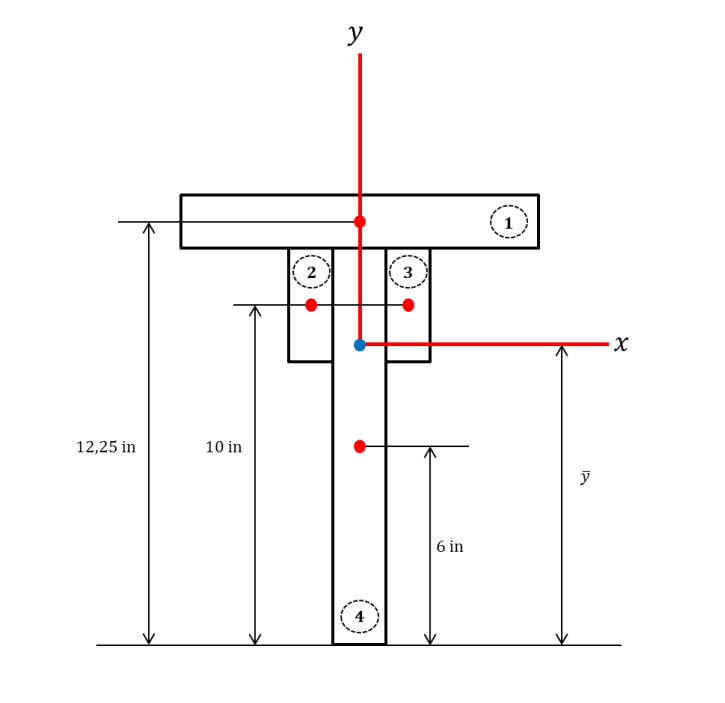

In [91]:
ipd.Image(filename='L8Q1-1.png')

Vamos listar as coordenadas dos centroides em relação a Y e as áreas associadas:

In [92]:
# centroides das áreas individuais:
Y1 = L_alma + L_alma2 + espessura_base/2
Y2 = L_alma + L_alma2/2
Y3 = Y2
Y4 = (L_alma + L_alma2)/2

# Áreas individuais:
A1 = espessura_base * L_base
A2 = espessura_base * L_alma2
A3 = A2
A4 = (L_alma + L_alma2) * (2 * espessura_base)

data_areas = pd.DataFrame({
    'Centroides em Y (in):':[Y1, Y2, Y3, Y4],
    'Áreas na secção (in²):':[A1, A2, A3, A4],
    'Bases em X: (in)': [L_base, espessura_base, espessura_base, 2 * espessura_base],
    'Alturas em Y: (in)': [espessura_base, L_alma2, L_alma2, L_alma + L_alma2]

})
data_areas

,Centroides em Y (in):,Áreas na secção (in²):,Bases em X: (in),Alturas em Y: (in)
0,12.25,5.0,10.0,0.5
1,10.00,2.0,0.5,4.0
2,10.00,2.0,0.5,4.0
3,6.00,12.0,1.0,12.0


In [93]:
C = data_areas.iloc[:,0:1].squeeze()
A = data_areas.iloc[:,1:2].squeeze()
y_barra = np.dot(C, A) / sum(A)
print('Centroide da ára composta é Y: {} in'.format(y_barra))

Centroide da ára composta é Y: 8.25 in


O eixo Y é uma simetria em relação ao plano da área, logo, a coordenada do eixo X é zero, então temos:

In [94]:
p = (0, y_barra)
p

Agora para realizar os cálculos dos momentos de inércia, temos a seguinte função: ela realizará os cálulos para inércia com as áreas deslocadas do centroide:

In [95]:
def inertia(base, altura, CY):
    inertia_1 = base * altura ** 3 / 12
    inertia_area = base * altura * CY ** 2
    return  inertia_area + inertia_1

Cálculo da inércia em relação ao eixo X:

In [101]:
distancia_centroidesY = [4, 1.75, 1.75, - 2.25]
soma_inertiasX = []
for index in range(4):
    soma_inertiasX.append(inertia(data_areas.iloc[index:index+1,2:3].squeeze(),
                                 data_areas.iloc[index:index+1,3:4].squeeze(),
                                 distancia_centroidesY[index]
                                 ))
inertia_X = sum(soma_inertiasX)
print('Inércia em X: {:.3f} in^4'.format(inertia_X))

Inércia em X: 302.438 in^4


In [104]:
distancia_centroidesX = [0, -0.75, 0.75, 0]
soma_inertiasY = []
for index in range(4):
    soma_inertiasY.append(inertia(data_areas.iloc[index:index+1,3:4].squeeze(),
                                 data_areas.iloc[index:index+1,2:3].squeeze(),
                                 distancia_centroidesX[index]
                                 ))
inertia_Y = sum(soma_inertiasY)
print('Inercia em Y: {:.3f} in ^4'.format(inertia_Y))

Inercia em Y: 45.000 in ^4


Agora o cálculo do produto de inércia:
Nota: a simetria do conjunto faz o produto de inércia ser igual a zero, logo, a conta é simplificada:

In [107]:
def produto_inertia(CX, CY, Area):
    return CX * CY * Area
produto = []
for index in range(4):
    produto.append(produto_inertia(distancia_centroidesX[index],
                                   distancia_centroidesY[index],
                                   data_areas.iloc[index:index+1,1:2].squeeze()
                                   ))
produto_total = sum(produto)
print('Produto de Inercia em Y: {:.3f} in ^4'.format(produto_total))

Produto de Inercia em Y: 0.000 in ^4


Portanto, temos as informações necessárias para caracterizar o plano de inércia:

In [110]:
plano_inercia = pd.DataFrame({
    'Inercia em X (in^4)': inertia_X,
    'Inercia em Y (in^4)': inertia_Y,
    'Produto de inércia (in^4)': produto_total
}, index=[0])
plano_inercia

,Inercia em X (in^4),Inercia em Y (in^4),Produto de inércia (in^4)
0,302.4375,45.0,0.0


Agora podemos realizar o cálculo dos momentos no plano rotacionado:

In [111]:
def analise_inertia(ix, iy ,pxy, a):
    angle = a
    inertia_x  = ((ix+iy)/2) + ((ix- iy)/2)*np.cos(2*angle) + (pxy/2)*np.sin(2*angle)
    inertia_y = ((ix+iy)/2) - ((ix-iy)/2)*np.cos(2*angle) - (pxy/2)*np.sin(2*angle)
    produto_xy = (ix-iy)/2*np.sin(2*angle) + pxy*np.cos(2*angle)

    data_rotate = pd.DataFrame({
    'Ângulo ( º)': m.degrees(a),
    'Inércia em U (in^4)': inertia_x,
    'Inércia em V (in^4)': inertia_y,
    'Produto inércia (in^4)': produto_xy
    }, index=[0])
    return data_rotate

In [112]:
analise_inertia(plano_inercia.iloc[0:1, 0:1].squeeze(), plano_inercia.iloc[0:1, 1:2].squeeze(), plano_inercia.iloc[0:1, 2:3].squeeze(), theta)

,Ângulo ( º),Inércia em U (in^4),Inércia em V (in^4),Produto inércia (in^4)
0,60.0,109.359375,238.078125,111.473707


Cálculo dos momentos de inércia principais, temos:

In [113]:
def inertia_principal (x, y, z):
    angular = np.arctan(2 * z / (x - y)) / 2
    angular = m.degrees(angular)
    inertia_media = (x + y) / 2
    radius = m.sqrt(((x - y) / 2) ** 2 + (z / 2) ** 2)
    main_1 = inertia_media + radius
    main_2 = inertia_media - radius

    data_rotate = pd.DataFrame({
    'Centro do circulo (in^4)': inertia_media,
    'Ângulo principal ( º)': angular,
    'Inércia P1 (in^4)': main_1,
    'Inércia P2 (in^4)': main_2,
    'Produto max (in^4)': radius
    }, index=[0])

    return data_rotate.T

In [114]:
inertia_principal(plano_inercia.iloc[0:1, 0:1].squeeze(), plano_inercia.iloc[0:1, 1:2].squeeze(), plano_inercia.iloc[0:1, 2:3].squeeze())

,0
Centro do circulo (in^4),173.71875
Ângulo principal ( º),0.00000
Inércia P1 (in^4),302.43750
Inércia P2 (in^4),45.00000
Produto max (in^4),128.71875
